# Understanding Artificial Intelligence

#### Student number: 202353550

In [1]:
#!pip install tensorflow pandas numpy matplotlib opencv-python


In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Set paths to the dataset
train_dir = "C:\\Users\\User\\OneDrive - hull.ac.uk\\Understanding_AI_771763\\Summative_Assessment\\CNN\\Emergency_Vehicles\\train"
test_dir = "C:\\Users\\User\\OneDrive - hull.ac.uk\\Understanding_AI_771763\\Summative_Assessment\\CNN\\Emergency_Vehicles\\test"
train_csv = "C:\\Users\\User\\OneDrive - hull.ac.uk\\Understanding_AI_771763\\Summative_Assessment\\CNN\\Emergency_Vehicles\\train.csv"
test_csv = "C:\\Users\\User\\OneDrive - hull.ac.uk\\Understanding_AI_771763\\Summative_Assessment\\CNN\\Emergency_Vehicles\\test.csv"

# Load CSV files containing image names and labels
train_data = pd.read_csv("C:\\Users\\User\\OneDrive - hull.ac.uk\\Understanding_AI_771763\\Summative_Assessment\\CNN\\Emergency_Vehicles\\train.csv")

# Load CSV file containing image names for the test set (no labels)
test_data = pd.read_csv("C:\\Users\\User\\OneDrive - hull.ac.uk\\Understanding_AI_771763\\Summative_Assessment\\CNN\\Emergency_Vehicles\\test.csv")

# Helper function to load images and labels for training data
def load_images_with_labels(data, img_dir):
    images = []
    labels = []
    for i, row in data.iterrows():
        img_path = os.path.join(img_dir, row['image_names'])
        img = load_img(img_path, target_size=(224, 224))  # Resize images
        img = img_to_array(img) / 255.0  # Normalize the images to [0, 1]
        images.append(img)
        labels.append(row['emergency_or_not'])
    return np.array(images), np.array(labels)

# Helper function to load images (no labels) for test data
def load_images_without_labels(data, img_dir):
    images = []
    for i, row in data.iterrows():
        img_path = os.path.join(img_dir, row['image_names'])
        img = load_img(img_path, target_size=(224, 224))  # Resize images
        img = img_to_array(img) / 255.0  # Normalize the images to [0, 1]
        images.append(img)
    return np.array(images)

# Load training images and labels
X_train, y_train = load_images_with_labels(train_data, train_dir)

# Load test images (no labels)
X_test = load_images_without_labels(test_data, test_dir)


# Split the training data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ensure the labels are binary
y_train = np.array(y_train)
y_val = np.array(y_val)


#### Data augmentation

In [4]:

datagen = ImageDataGenerator(
 rotation_range=20, # Randomly rotate images up to 10 degrees
 width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1,# Randomly shift images vertically up to 10% of the height
 horizontal_flip=True,  # Randomly flip images horizontally
 vertical_flip=False, # Don't randomly flip images vertically
 shear_range=0.10, # crops part of the image
 zoom_range=0.10 # #zooms the image by 10%
)

# Fit the generator to the training data
datagen.fit(X_train)

#### View the first five images

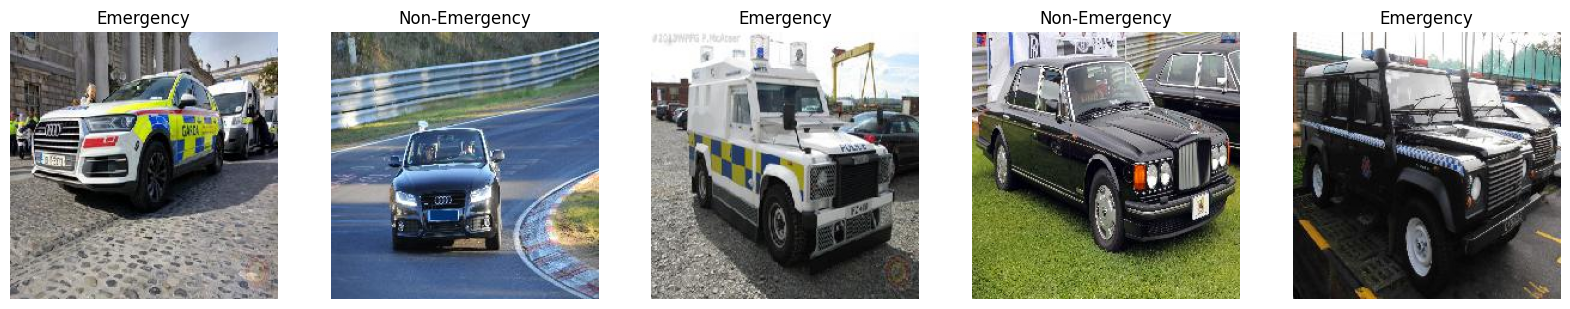

In [5]:

# View the first five images
def display_images(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(20, 10))
    for i in range(5):
        axes[i].imshow(images[i])
        axes[i].axis('off')  # Hide axis labels
        label = 'Emergency' if labels[i] == 1 else 'Non-Emergency'
        axes[i].set_title(label)
        plt.savefig("View.png")
    plt.show()

# Display the first 5 images from the training set
display_images(X_train, y_train)


#### Create CNN models 

### MODEL 1

In [7]:
# Create the CNN model
input_shape = (224, 224, 3)

def create_cnn_model1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Instantiate the model
model1 = create_cnn_model1(input_shape)

# Display the model summary
model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile and train model

In [8]:

# Create and train the model
model1 = create_cnn_model1(X_train.shape[1:])

model1.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])

# Train the model  right after compiling
history1 = model1.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=20,  # You can adjust this
    batch_size=32, 
    verbose=1
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 875ms/step - accuracy: 0.6331 - loss: 0.8032 - val_accuracy: 0.7697 - val_loss: 0.5557
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 862ms/step - accuracy: 0.7714 - loss: 0.5103 - val_accuracy: 0.7879 - val_loss: 0.4938
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 842ms/step - accuracy: 0.8154 - loss: 0.4239 - val_accuracy: 0.7848 - val_loss: 0.4407
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 834ms/step - accuracy: 0.8653 - loss: 0.3338 - val_accuracy: 0.8000 - val_loss: 0.4609
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 843ms/step - accuracy: 0.8987 - loss: 0.2611 - val_accuracy: 0.8030 - val_loss: 0.4406
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 834ms/step - accuracy: 0.9349 - loss: 0.1709 - val_accuracy: 0.7970 - val_loss: 0.4696
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 832ms/step - accuracy: 0.9481 - loss: 0.1593 - val_accuracy: 0.8152 - val_loss: 0.5640
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 830ms/step - accuracy: 0.9748 - loss: 0.0686 - val_accu

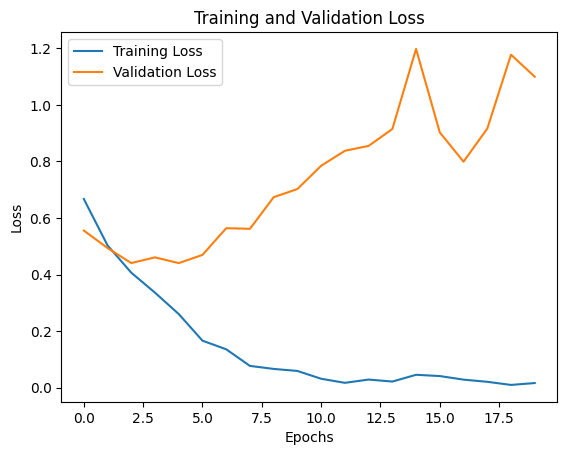

In [9]:
# Plot the training and validation loss

plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("TVL_mod1.png")
plt.show()


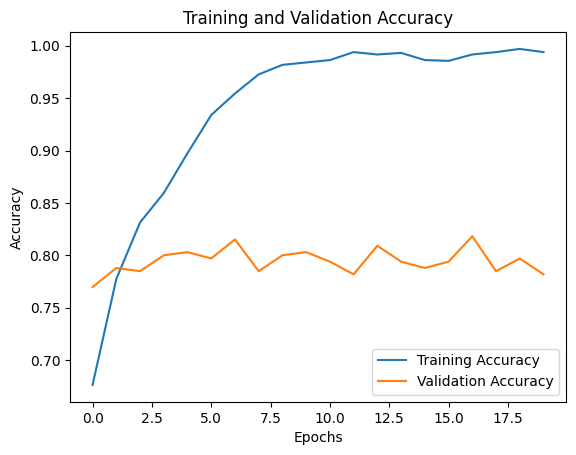

In [10]:
# Plot the training and validation accuracy

plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("TVA_mod1.png")
plt.legend()

plt.show()

#### Evaluate the model on validation set (X_val, y_val)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       198
           1       0.70      0.80      0.75       132

    accuracy                           0.78       330
   macro avg       0.78      0.79      0.78       330
weighted avg       0.79      0.78      0.78       330



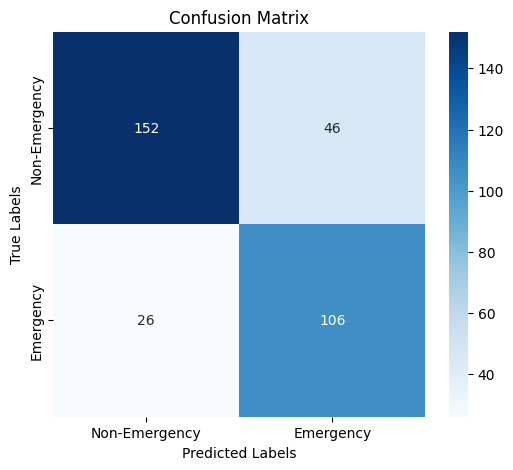

In [11]:

val_predictions1 = model1.predict(X_val)
val_predicted_classes1 = (val_predictions1 > 0.5).astype(int).flatten()

# Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, val_predicted_classes1))

# Confusion Matrix for validation set
cm1 = confusion_matrix(y_val, val_predicted_classes1)
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
xticklabels=['Non-Emergency', 'Emergency'],
yticklabels=['Non-Emergency', 'Emergency'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("C_mod1.png")
plt.show()

### MODEL 2 : Early stopping to update model 1 and reduce overfitting 

In [12]:
# Create the CNN model
input_shape = (224, 224, 3)

def create_cnn_model2(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Instantiate the model
model2 = create_cnn_model2(input_shape)

# Display the model summary
model2.summary()



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
 
# Create and train the model
model2 = create_cnn_model2(X_train.shape[1:])

model2.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])


 # Define Early Stopping callback 

early_stopping2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model  right after compiling
history2 = model2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=20,  # You can adjust this
    batch_size=32, 
    verbose=1,
    callbacks=[early_stopping2]
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 880ms/step - accuracy: 0.6309 - loss: 0.7247 - val_accuracy: 0.7182 - val_loss: 0.5288
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 850ms/step - accuracy: 0.7379 - loss: 0.5447 - val_accuracy: 0.7576 - val_loss: 0.5122
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 836ms/step - accuracy: 0.7938 - loss: 0.4268 - val_accuracy: 0.7394 - val_loss: 0.5552
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 875ms/step - accuracy: 0.7957 - loss: 0.4527 - val_accuracy: 0.7909 - val_loss: 0.4397
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 887ms/step - accuracy: 0.8727 - loss: 0.3267 - val_accuracy: 0.7939 - val_loss: 0.4272
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 867ms/step - accuracy: 0.9091 - loss: 0.2735 - val_accuracy: 0.8000 - val_loss: 0.4304
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 880ms/step - accuracy: 0.9139 - loss: 0.2214 - val_accuracy: 0.7879 - val_loss: 0.4496
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 883ms/step - accuracy: 0.9434 - loss: 0.1368 - val_accu

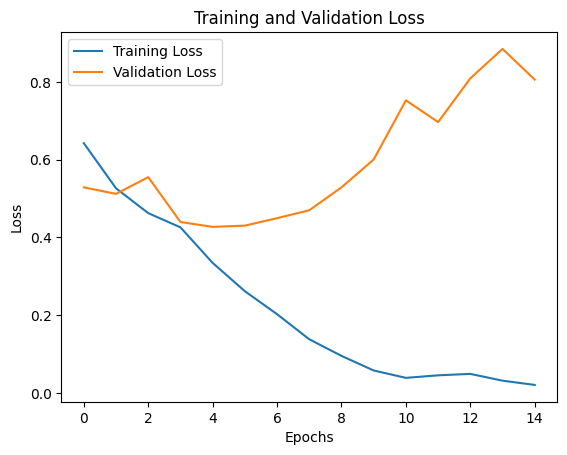

In [14]:
# Plot the training and validation loss

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("TVL_mod2.png")
plt.show()


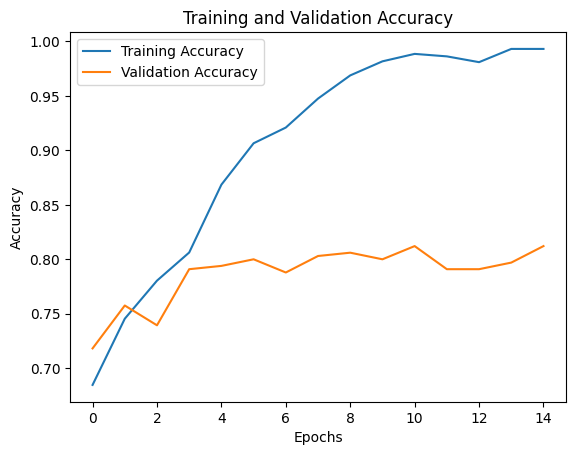

In [15]:
# Plot the training and validation accuracy

plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("TVA_mod2.png")
plt.legend()

plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       198
           1       0.86      0.58      0.69       132

    accuracy                           0.79       330
   macro avg       0.81      0.76      0.77       330
weighted avg       0.80      0.79      0.78       330



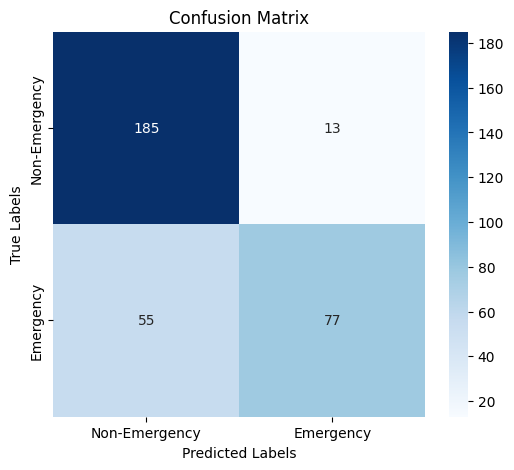

In [16]:
val_predictions2 = model2.predict(X_val)
val_predicted_classes2 = (val_predictions2 > 0.5).astype(int).flatten()

# Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, val_predicted_classes2))

# Confusion Matrix for validation set
cm2 = confusion_matrix(y_val, val_predicted_classes2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
xticklabels=['Non-Emergency', 'Emergency'],
yticklabels=['Non-Emergency', 'Emergency'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("C_mod2.png")
plt.show()

#### MODEL 3

Batch-size=64, patience= 5

In [56]:
# Create the CNN model
input_shape = (224, 224, 3)

def create_cnn_model3(input_shape):
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.6),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Instantiate the model
model3 = create_cnn_model3(input_shape)

# Display the model summary
model3.summary()



Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
 
# Create and train the model
model3 = create_cnn_model3(X_train.shape[1:])

model3.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])


 # Define Early Stopping callback 

early_stopping3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model  right after compiling
history3 = model3.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,  # You can adjust this
    batch_size=64, 
    verbose=1,
    callbacks=[early_stopping3]
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.5050 - loss: 0.9999 - val_accuracy: 0.6000 - val_loss: 0.6512
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 455ms/step - accuracy: 0.6092 - loss: 0.6380 - val_accuracy: 0.7424 - val_loss: 0.5485
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.7409 - loss: 0.5482 - val_accuracy: 0.7364 - val_loss: 0.5302
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.7704 - loss: 0.5235 - val_accuracy: 0.7879 - val_loss: 0.4656
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - accuracy: 0.7991 - loss: 0.4588 - val_accuracy: 0.7848 - val_loss: 0.4546
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 479ms/step - accuracy: 0.8198 - loss: 0.4204 - val_accuracy: 0.7848 - val_loss: 0.4591
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - accuracy: 0.8150 - loss: 0.4042 - val_accuracy: 0.8152 - val_loss: 0.4362
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 537ms/step - accuracy: 0.8162 - loss: 0.4008 - val_accu

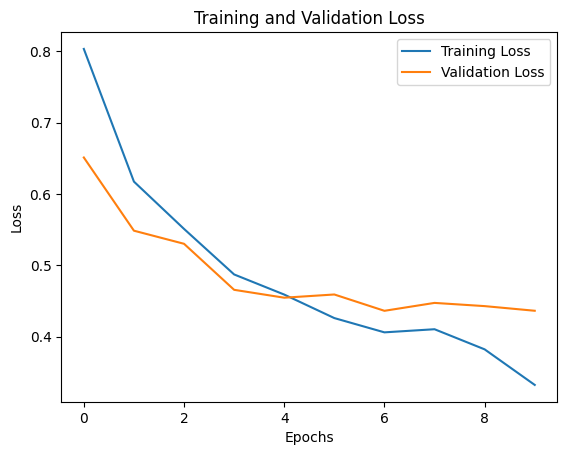

In [58]:
# Plot the training and validation loss

plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("TVL_mod3.png")
plt.show()


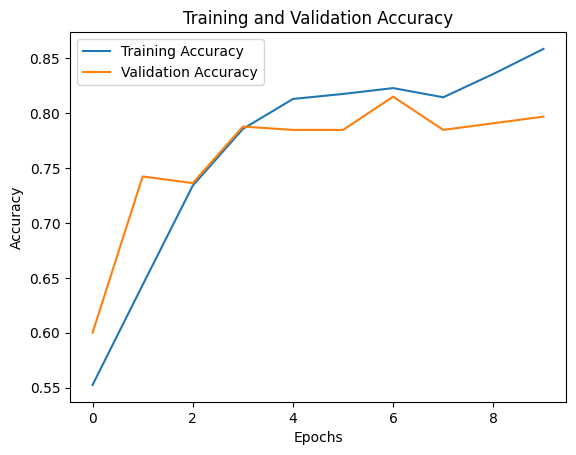

In [59]:
# Plot the training and validation accuracy

plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("TVA_mod3.png")
plt.legend()

plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       198
           1       0.78      0.76      0.77       132

    accuracy                           0.82       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.82      0.81       330



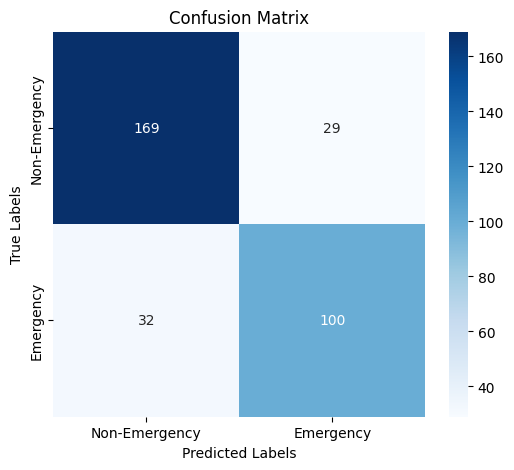

In [60]:
val_predictions3 = model3.predict(X_val)
val_predicted_classes3 = (val_predictions3 > 0.5).astype(int).flatten()

# Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, val_predicted_classes3))

# Confusion Matrix for validation set
cm3 = confusion_matrix(y_val, val_predicted_classes3)
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues",
xticklabels=['Non-Emergency', 'Emergency'],
yticklabels=['Non-Emergency', 'Emergency'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("C_mod3.png")
plt.show()

#### MODEL 4

In [68]:
# Create the CNN model
input_shape = (224, 224, 3)

def create_cnn_model4(input_shape):
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.6),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Instantiate the model
model4 = create_cnn_model4(input_shape)

# Display the model summary
model4.summary()



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_97 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
 
# Create and train the model
model4 = create_cnn_model4(X_train.shape[1:])

model4.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])


 # Define Early Stopping callback 

early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model  right after compiling
history4 = model4.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,  # You can adjust this
    batch_size=64, 
    verbose=1,
    callbacks=[early_stopping4]
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 470ms/step - accuracy: 0.5349 - loss: 0.8975 - val_accuracy: 0.7152 - val_loss: 0.6292
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 467ms/step - accuracy: 0.6864 - loss: 0.6025 - val_accuracy: 0.7212 - val_loss: 0.5303
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - accuracy: 0.7578 - loss: 0.5308 - val_accuracy: 0.7636 - val_loss: 0.5028
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - accuracy: 0.7613 - loss: 0.5107 - val_accuracy: 0.7939 - val_loss: 0.4706
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 458ms/step - accuracy: 0.7972 - loss: 0.4540 - val_accuracy: 0.7667 - val_loss: 0.4898
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.7793 - loss: 0.4632 - val_accuracy: 0.7909 - val_loss: 0.4401
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.8218 - loss: 0.3835 - val_accuracy: 0.7939 - val_loss: 0.4361
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.8612 - loss: 0.3337 - val_accu

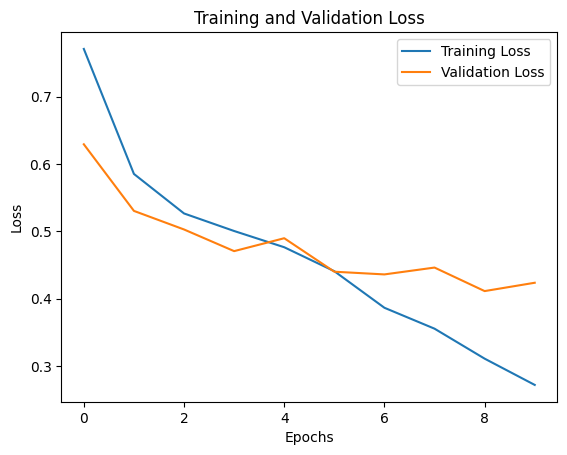

In [70]:
# Plot the training and validation loss

plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("TVL_mod4.png")
plt.show()


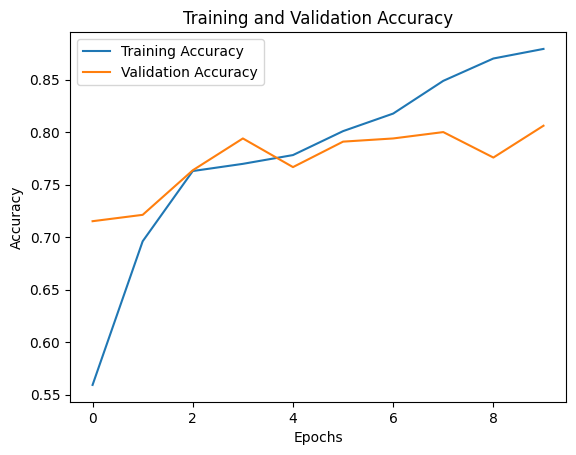

In [71]:
# Plot the training and validation accuracy

plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("TVA_mod4.png")
plt.legend()

plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       198
           1       0.70      0.77      0.73       132

    accuracy                           0.78       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.78      0.78      0.78       330



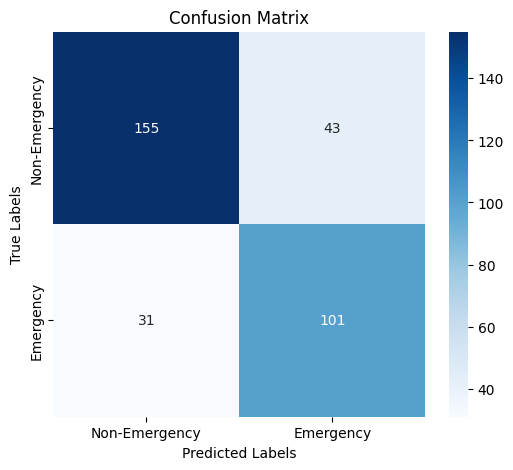

In [72]:
val_predictions4 = model4.predict(X_val)
val_predicted_classes4 = (val_predictions4 > 0.5).astype(int).flatten()

# Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, val_predicted_classes4))

# Confusion Matrix for validation set
cm4 = confusion_matrix(y_val, val_predicted_classes4)
plt.figure(figsize=(6, 5))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues",
xticklabels=['Non-Emergency', 'Emergency'],
yticklabels=['Non-Emergency', 'Emergency'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("C_mod4.png")
plt.show()

#### MODEL 5

In [74]:
# Create the CNN model
input_shape = (224, 224, 3)

def create_cnn_model5(input_shape):
    model = Sequential([
        Conv2D(8, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Instantiate the model
model5 = create_cnn_model5(input_shape)

# Display the model summary
model5.summary()



Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)                  │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_105 (MaxPooling2D)     │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_106 (MaxPooling2D)     │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 52, 52, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_107 (MaxPooling2D)     │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_35 (Flatten)                 │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │         692,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 698,321 (2.66 MB)

 Trainable params: 698,321 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
 
# Create and train the model
model5 = create_cnn_model5(X_train.shape[1:])

model5.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])


 # Define Early Stopping callback 

early_stopping5 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model  right after compiling
history5 = model5.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,  # You can adjust this
    batch_size=64, 
    verbose=1,
    callbacks=[early_stopping5]
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.5283 - loss: 0.7271 - val_accuracy: 0.6000 - val_loss: 0.6482
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5771 - loss: 0.6310 - val_accuracy: 0.5939 - val_loss: 0.5833
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.5852 - loss: 0.6081 - val_accuracy: 0.6606 - val_loss: 0.5848
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.6831 - loss: 0.5674 - val_accuracy: 0.7545 - val_loss: 0.5779
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.7602 - loss: 0.5513 - val_accuracy: 0.7485 - val_loss: 0.5331
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.7457 - loss: 0.5521 - val_accuracy: 0.7879 - val_loss: 0.5393
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.7635 - loss: 0.5139 - val_accuracy: 0.7545 - val_loss: 0.5225
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.7846 - loss: 0.4999 - val_accuracy: 0.

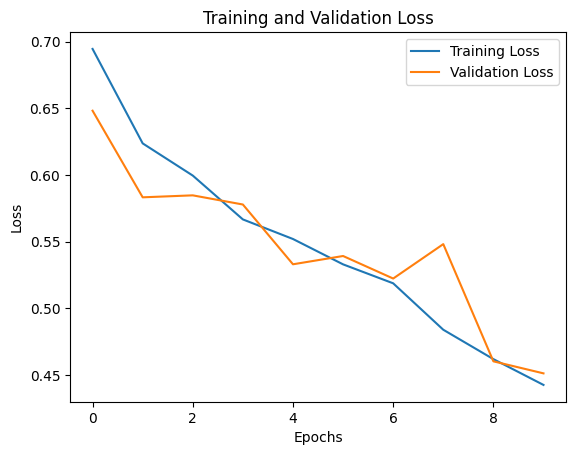

In [76]:
# Plot the training and validation loss

plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("TVL_mod5.png")
plt.show()


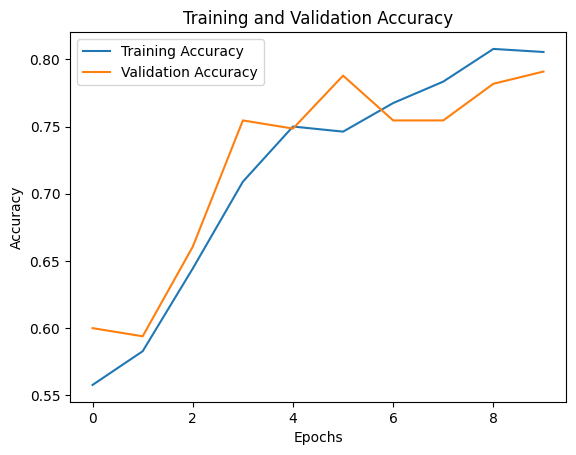

In [77]:
# Plot the training and validation accuracy

plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("TVA_mod5.png")
plt.legend()

plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       198
           1       0.71      0.82      0.76       132

    accuracy                           0.79       330
   macro avg       0.79      0.80      0.79       330
weighted avg       0.80      0.79      0.79       330



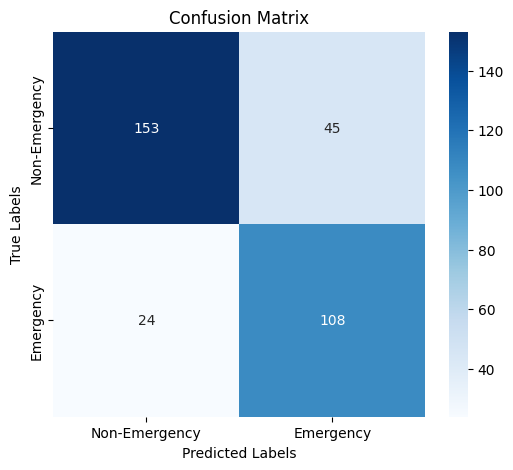

In [78]:
val_predictions5 = model5.predict(X_val)
val_predicted_classes5 = (val_predictions5 > 0.5).astype(int).flatten()

# Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, val_predicted_classes5))

# Confusion Matrix for validation set
cm5 = confusion_matrix(y_val, val_predicted_classes5)
plt.figure(figsize=(6, 5))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues",
xticklabels=['Non-Emergency', 'Emergency'],
yticklabels=['Non-Emergency', 'Emergency'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("C_mod5.png")
plt.show()

#### MODEL 6

In [102]:
# Create the CNN model
input_shape = (224, 224, 3)

def create_cnn_model6(input_shape):
    model = Sequential([
        Conv2D(8, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Instantiate the model
model6 = create_cnn_model6(input_shape)

# Display the model summary
model6.summary()



Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_150 (Conv2D)                  │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_150 (MaxPooling2D)     │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_151 (Conv2D)                  │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_151 (MaxPooling2D)     │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_152 (Conv2D)                  │ (None, 52, 52, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_152 (MaxPooling2D)     │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_50 (Flatten)                 │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │         346,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 349,889 (1.33 MB)

 Trainable params: 349,889 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
 
# Create and train the model
model6 = create_cnn_model6(X_train.shape[1:])

model6.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])


 # Define Early Stopping callback 

early_stopping6 = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model  right after compiling
history6 = model6.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,  # You can adjust this
    batch_size=64, 
    verbose=1,
    callbacks=[early_stopping6]
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.5755 - loss: 0.7162 - val_accuracy: 0.6000 - val_loss: 0.6455
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.5921 - loss: 0.6316 - val_accuracy: 0.6000 - val_loss: 0.5936
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.6357 - loss: 0.5852 - val_accuracy: 0.6697 - val_loss: 0.5777
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7215 - loss: 0.5900 - val_accuracy: 0.7485 - val_loss: 0.5642
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7710 - loss: 0.5481 - val_accuracy: 0.7303 - val_loss: 0.5580
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7739 - loss: 0.5386 - val_accuracy: 0.7212 - val_loss: 0.5427
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7951 - loss: 0.5146 - val_accuracy: 0.7848 - val_loss: 0.5510
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.7801 - loss: 0.5173 - val_accuracy: 0.

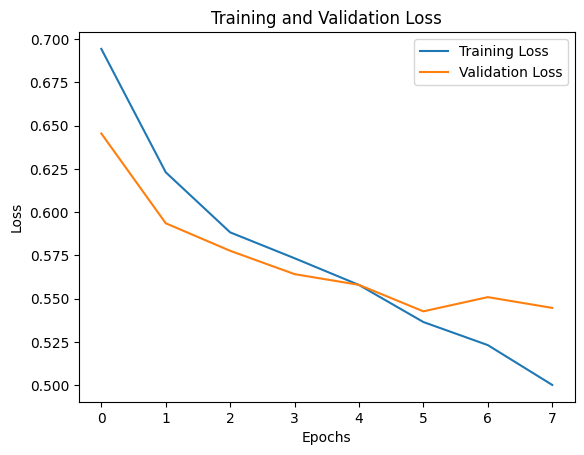

In [104]:
# Plot the training and validation loss

plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("TVL_mod6")
plt.show()


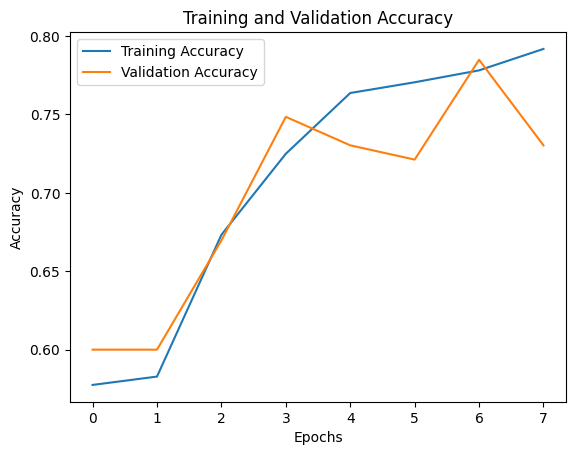

In [105]:
# Plot the training and validation accuracy

plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("TVA_mod6")
plt.legend()

plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       198
           1       0.79      0.41      0.54       132

    accuracy                           0.72       330
   macro avg       0.75      0.67      0.67       330
weighted avg       0.74      0.72      0.70       330



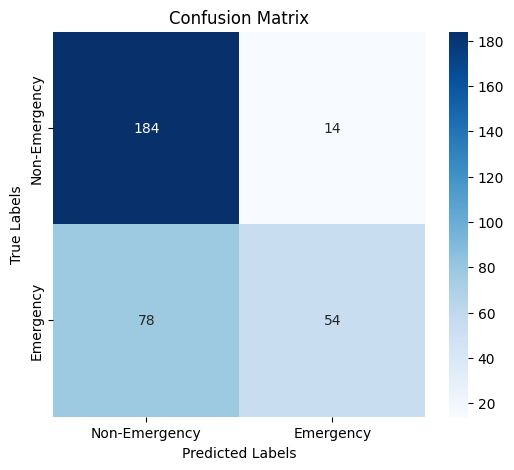

In [106]:
val_predictions6 = model6.predict(X_val)
val_predicted_classes6 = (val_predictions6 > 0.5).astype(int).flatten()

# Classification Report for validation set
print("Classification Report:")
print(classification_report(y_val, val_predicted_classes6))

# Confusion Matrix for validation set
cm6 = confusion_matrix(y_val, val_predicted_classes6)
plt.figure(figsize=(6, 5))
sns.heatmap(cm6, annot=True, fmt="d", cmap="Blues",
xticklabels=['Non-Emergency', 'Emergency'],
yticklabels=['Non-Emergency', 'Emergency'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("C_mod6.png")
plt.show()

#### Evlauting model 5 using the unseen test data

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


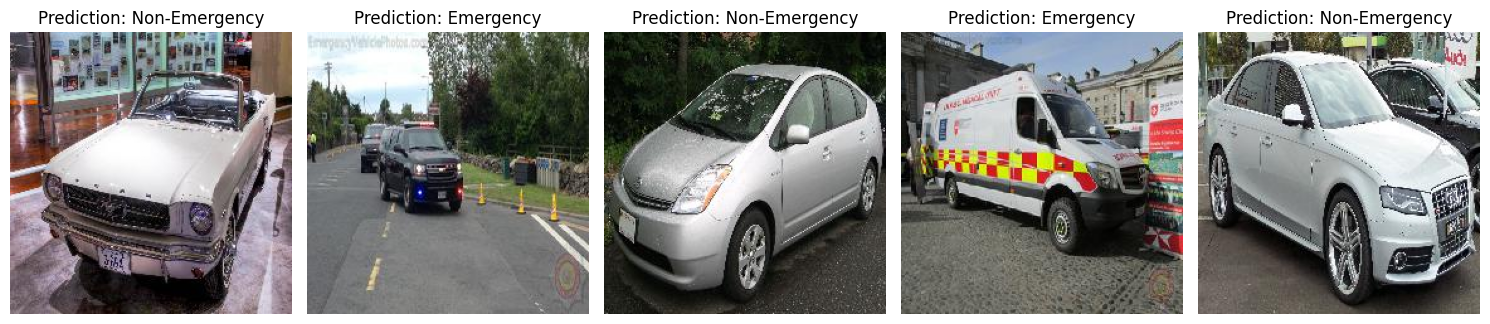

In [107]:
# Predict on the unseen test data
predictions5 = model5.predict(X_test)
predicted_classes5 = (predictions5 > 0.5).astype(int).flatten()


import matplotlib.pyplot as plt

# Display a few sample predictions
def display_sample_predictions(X_test, predicted_classes5, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[i], cmap='gray')  # Use cmap='gray' for grayscale images
        plt.title(f"Prediction: {'Emergency' if predicted_classes5[i] == 1 else 'Non-Emergency'}")
        plt.axis('off')  # Hide axis for better visualization
    plt.tight_layout()
    plt.savefig("Predictions.png")
    plt.show()

# Call the function to display predictions
display_sample_predictions(X_test, predicted_classes5, num_samples=5)


Predictions saved to test_predictions.csv
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       321

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706



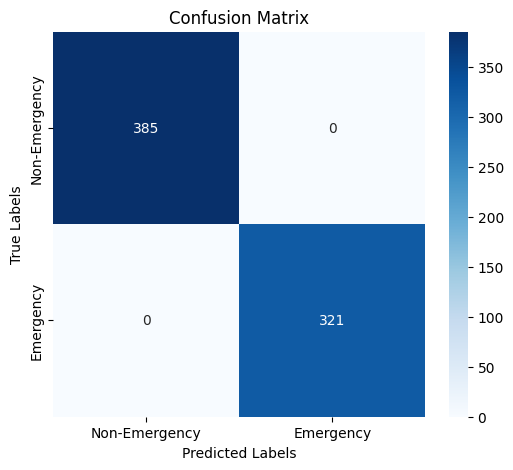

In [108]:
# Save predictions for manual evaluation
test_data['Predicted Class'] = predicted_classes5
test_data.to_csv("test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")

# Check if y_test is available for evaluation
if 'Predicted Class' in test_data.columns:  # Replace with actual label column name
    y_test5 = test_data['Predicted Class']
    print("Classification Report:")
    
    from sklearn.metrics import confusion_matrix, classification_report 
    print(classification_report(y_test5, predicted_classes5))

    # Confusion Matrix
    cm5x = confusion_matrix(y_test5, predicted_classes5)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm5x, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Non-Emergency', 'Emergency'], 
                yticklabels=['Non-Emergency', 'Emergency'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig("ConfX_mod.png")
    plt.show()
else:
    print("y_test not available in the test data. Predictions saved for manual evaluation.")
